## Module 1 - Data Sources - Homework

#### Project goal
The goal of this project is to dowload financial data and conduct an analysis to answer following questions:
1. Which year had the highest number of additions? (S&P500). How many current S&P 500 stocks have been in the index for more than 20 years? 
2. How many indexes (out of 10) have better year-to-date returns than the US (S&P500) as of May 1, 2025?
- United States - S&P 500 (^GSPC)
- China - Shanghai Composite (000001.SS)
- Hong Kong - HANG SENG INDEX (^HSI)
- Australia - S&P/ASX 200 (^AXJO)
- India - Nifty 50 (^NSEI)
- Canada - S&P/TSX Composite (^GSPTSE)
- Germany - DAX (^GDAXI)
- United Kingdom - FTSE 100 (^FTSE)
- Japan - Nikkei 225 (^N225)
- Mexico - IPC Mexico (^MXX)
- Brazil - Ibovespa (^BVSP)
3. Calculate the median duration (in days) of significant market corrections in the S&P 500 index.
4. Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.
5. Brainstorm capstone project ideas.
6. Investigate new metrics.

In [1]:
# Dowload data
import yfinance as yf

# Data processing
import pandas as pd
import datetime as dt
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

#### Collect a list of companies included in S&P 500

In [2]:
# Load data for S&P 500 companies
sp_500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [3]:
sp_500.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

#### Download data

In [4]:
tickers = ['^GSPC','000001.SS','^HSI','^AXJO','^NSEI','^GSPTSE','^GDAXI','^FTSE','^N225','^MXX','^BVSP']

In [5]:
df = yf.download(tickers, start="2025-01-01", end="2025-05-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  11 of 11 completed


In [6]:
df = df['Close'].copy()

In [7]:
df.head()

Ticker        000001.SS        ^AXJO     ^BVSP        ^FTSE        ^GDAXI  \
Date                                                                        
2025-01-01          NaN          NaN       NaN          NaN           NaN   
2025-01-02  3262.561035  8201.200195  120125.0  8260.099609  20024.660156   
2025-01-03  3211.429932  8250.500000  118533.0  8224.000000  19906.080078   
2025-01-06  3206.923096  8288.500000  120022.0  8249.700195  20216.189453   
2025-01-07  3229.644043  8285.099609  121163.0  8245.299805  20340.570312   

Ticker            ^GSPC       ^GSPTSE          ^HSI          ^MXX  \
Date                                                                
2025-01-01          NaN           NaN           NaN           NaN   
2025-01-02  5868.549805  24898.000000  19623.320312  49765.199219   
2025-01-03  5942.470215  25073.500000  19760.269531  48957.238281   
2025-01-06  5975.379883  24999.800781  19688.289062  49493.558594   
2025-01-07  5909.029785  24929.900391  19447.580078  50085.500000   

Ticker             ^N225         ^NSEI  
Date                                    
2025-01-01           NaN  23742.900391  
2025-01-02           NaN  24188.650391  
2025-01-03           NaN  24004.750000  
2025-01-06  39307.050781  23616.050781  
2025-01-07  40083.300781  23707.900391

#### Prepare data for analysis

In [8]:
sp_500 = sp_500[['Symbol','Security', 'Date added']].copy()

In [9]:
# Convert 'Date added' to datetime
sp_500['Date added'] = pd.to_datetime(sp_500['Date added'])

In [10]:
# Extract year from 'Date added'
sp_500['Year'] = sp_500['Date added'].dt.year

In [11]:
sp_500.head()

Symbol             Security Date added  Year
0    MMM                   3M 1957-03-04  1957
1    AOS          A. O. Smith 2017-07-26  2017
2    ABT  Abbott Laboratories 1957-03-04  1957
3   ABBV               AbbVie 2012-12-31  2012
4    ACN            Accenture 2011-07-06  2011

#### Analysis

In [12]:
# Number of stocks added each year

sp_500_groupby_year = sp_500.groupby('Year').size().sort_values(ascending=False).head(2)
sp_500_groupby_year

Year
1957    53
2017    23
dtype: int64

In [13]:
# Stocks that have been > 20 years. (2025-20=2005)

sp_500[sp_500['Date added'] < '2005'].count()

Symbol        219
Security      219
Date added    219
Year          219
dtype: int64

#### Question 1: Which year had the highest number of additions? How many current S&P 500 stocks have been in the index for more than 20 years? 
Answer: Apart from 1957 ( as it was the year when the S&P 500 index was founded), the highest number of companies added to the index is `2017` with 23 additions. There are `219` stocks that have been more than 20 years in the index.

In [14]:
# Calculate YTD returns for each index
rets = {}

for col in df.columns:
    
    start = df[col].dropna().iloc[0]
    end = df[col].dropna().iloc[-1]
    ret = round((end/start-1)*100,2)
    rets[col] = ret
    
rets = pd.DataFrame.from_dict(rets, orient='index', columns=['YTD Return'])
rets.index.name = 'Ticker'  
rets.sort_values(by='YTD Return',ascending=False)


YTD Return
Ticker               
^MXX            13.05
^HSI            12.72
^BVSP           12.44
^GDAXI          12.35
^FTSE            2.84
^NSEI            2.49
000001.SS        0.50
^GSPTSE         -0.23
^AXJO           -0.91
^GSPC           -5.10
^N225           -8.30

#### Question 2: How many indexes (out of 10) have better year-to-date returns than the US (S&P500) as of May 1, 2025?

Answer: 9 out of 10 indexes have better year-to-date returns as of May 1, 2025.

#### Calculate the median duration (in days) of significant market corrections in the S&P 500 index.

In [15]:
# Download S&P history since 1950
sp_500_history = yf.download('^GSPC', start='1950-01-01')

[*********************100%***********************]  1 of 1 completed


In [16]:
sp_500_history = sp_500_history['Close'].copy()

In [17]:
# Identify maximums (all-time-highs) 
sp_500_history['tops'] = sp_500_history.cummax(axis = 0)

In [18]:
tops = sp_500_history['tops']
prices = sp_500_history['^GSPC']
new_highs = tops[tops != tops.shift(1)]

In [19]:
# Identify corrections > 5%

corrections = []

# Iterate over consecutive peaks (pairs)
for i in range(len(new_highs) - 1):
    start_date = new_highs.index[i]
    end_date = new_highs.index[i + 1]
    peak_value = new_highs.iloc[i]
    
    # Period between 2 consecutive peaks
    drawdown_period = prices.loc[start_date:end_date]
    
    # correction bottom 
    min_value = drawdown_period.min()
    min_date = drawdown_period.idxmin()
    
    # Calculate drawdown %
    drawdown_pct = round((peak_value - min_value) / peak_value * 100, 2)
    
    # Correction duration in days (from top to bottom)
    duration = (min_date - start_date).days
    
    # Filter drawdowns > 5%
    if drawdown_pct >= 5:
        corrections.append({
            'Start (peak)': start_date.date(),
            'Duration [days]': duration,
            'Max drawdown %': drawdown_pct,
            'Bottom date': min_date.date()
        })

# Create dataframe
corrections_df = pd.DataFrame(corrections)

In [20]:
corrections_df['Start (peak)'] = pd.to_datetime(corrections_df['Start (peak)'])
corrections_df['Bottom date'] = pd.to_datetime(corrections_df['Bottom date'])

In [21]:
# Top 10 corrections by max drawdown
corrections_df.sort_values('Max drawdown %', ascending = False).head(10)

Start (peak)  Duration [days]  Max drawdown % Bottom date
56   2007-10-09              517           56.78  2009-03-09
54   2000-03-24              929           49.15  2002-10-09
24   1973-01-11              630           48.20  1974-10-03
22   1968-11-29              543           36.06  1970-05-26
65   2020-02-19               33           33.92  2020-03-23
35   1987-08-25              101           33.51  1987-12-04
15   1961-12-12              196           27.97  1962-06-26
27   1980-11-28              622           27.11  1982-08-12
68   2022-01-03              282           25.43  2022-10-12
18   1966-02-09              240           22.18  1966-10-07

In [22]:
corrections_df['Duration [days]'].median()

39.0

In [23]:
corrections_df['Duration [days]'].describe()

count     71.000000
mean     113.112676
std      179.099856
min        7.000000
25%       21.500000
50%       39.000000
75%       89.000000
max      929.000000
Name: Duration [days], dtype: float64

#### Question 3: Calculate the median duration (in days) of significant market corrections in the S&P 500 index
Answer: The median duration of the corrections > 5% is 39 days.

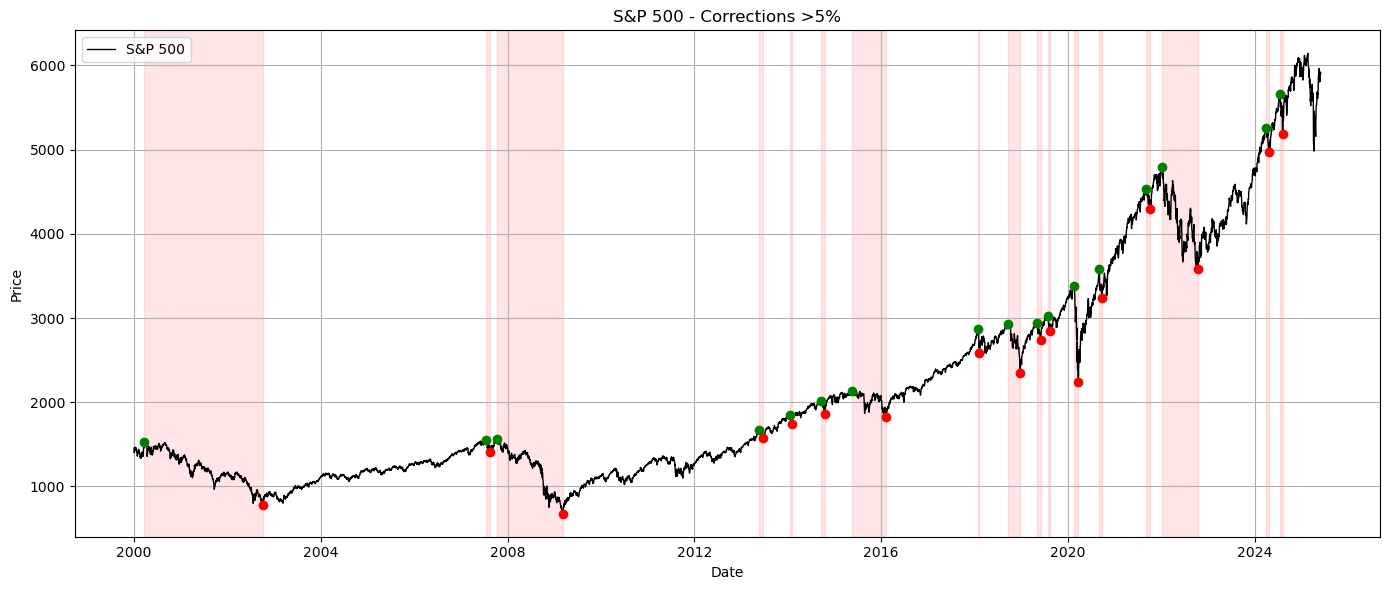

In [24]:
# Visualize corrections > 5%

# Filter data to zoom in/out the chart
start_date = '2000'
end_date = '2025'


sp_500_filtered = sp_500_history['^GSPC'].loc[start_date:end_date]
corrections_filtered = corrections_df[
    (corrections_df['Start (peak)'] >= pd.to_datetime(start_date)) &
    (corrections_df['Bottom date'] <= pd.to_datetime(end_date))
]

# Plot the corrections
plt.figure(figsize=(14, 6))
plt.plot(sp_500_filtered, label='S&P 500', color='black', linewidth=1)

for i, row in corrections_filtered.iterrows():
    start = row['Start (peak)']
    bottom = row['Bottom date']

    plt.axvspan(start, bottom, color='red', alpha=0.1)
    plt.plot(start, sp_500_history.at[start, '^GSPC'], 'go', label='Peak' if i == 0 else "")
    plt.plot(bottom, sp_500_history.at[bottom, '^GSPC'], 'ro', label='Bottom' if i == 0 else "")

plt.title(f"S&P 500 - Corrections >5%")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Load csv file with Amazon earnings and prcie history from yahoo finance

amazon = pd.read_csv('ha1_Amazon.csv', sep=';')

In [26]:
# Convert 'Surprise (%)' to float
amazon['Surprise (%)'] = (
    amazon['Surprise (%)']
    .str.strip()                         
    .replace('-', np.nan)               
    .replace('', np.nan)                
    .astype(float)                      
)

In [27]:
# Clean 'Earnings Date'
amazon['Earnings Date'] = (
    amazon['Earnings Date']
    .str.replace(r'\s+(EDT|EST|PDT|UTC)', '', regex=True) 
    .str.strip()                                         
)

In [28]:
# Covert to datetime and removing timestamp
amazon['Earnings Date'] = pd.to_datetime(amazon['Earnings Date'], errors='coerce').dt.normalize()

In [29]:
amazon[amazon['Surprise (%)'] > 0] # 86 positive surprises

Symbol           Company Earnings Date EPS Estimate Reported EPS  \
4     AMZN  Amazon.com, Inc.    2025-05-01       ???.36       ???.59   
5     AMZN  Amazon.com, Inc.    2025-02-06       ???.49       ???.86   
6     AMZN  Amazon.com, Inc.    2024-10-31       ???.14       ???.43   
7     AMZN  Amazon.com, Inc.    2024-08-01       01.???       ???.26   
8     AMZN  Amazon.com, Inc.    2024-04-30         0.83         0.98   
..     ...               ...           ...          ...          ...   
111   AMZN  Amazon.com, Inc.    1998-07-22            -            -   
112   AMZN  Amazon.com, Inc.    1998-04-27            -            -   
113   AMZN  Amazon.com, Inc.    1998-01-22            -            -   
114   AMZN  Amazon.com, Inc.    1997-10-27            -            -   
115   AMZN  Amazon.com, Inc.    1997-07-10            -            -   

     Surprise (%)  
4           16.74  
5           24.47  
6           25.17  
7           22.58  
8           17.91  
..            ...  
111          1.34  
112         13.92  
113         11.41  
114         13.29  
115         13.33  

[86 rows x 6 columns]

In [30]:
AMZN = yf.download('AMZN')

[*********************100%***********************]  1 of 1 completed


In [31]:
AMZN = AMZN['Close'].copy()

In [32]:
AMZN

Ticker            AMZN
Date                  
1997-05-15    0.097917
1997-05-16    0.086458
1997-05-19    0.085417
1997-05-20    0.081771
1997-05-21    0.071354
...                ...
2025-05-23  200.990005
2025-05-27  206.020004
2025-05-28  204.720001
2025-05-29  205.699997
2025-05-30  205.009995

[7055 rows x 1 columns]

In [33]:
# Create a new feature which represent 2-day returns forward (2 days ahead)
AMZN['2_day_pct_forward'] = (AMZN['AMZN'].shift(-2) - AMZN['AMZN']) / AMZN['AMZN']

In [34]:
AMZN.head()

Ticker          AMZN  2_day_pct_forward
Date                                   
1997-05-15  0.097917          -0.127659
1997-05-16  0.086458          -0.054211
1997-05-19  0.085417          -0.164639
1997-05-20  0.081771          -0.146494
1997-05-21  0.071354           0.051097

In [35]:
# Merge both tables on dates

merged_df = pd.merge(
    AMZN.reset_index(), 
    amazon, 
    left_on='Date', 
    right_on='Earnings Date', 
    how='left'
).set_index('Date').sort_index()


In [36]:
merged_df.head()

AMZN  2_day_pct_forward Symbol Company Earnings Date  \
Date                                                                   
1997-05-15  0.097917          -0.127659    NaN     NaN           NaT   
1997-05-16  0.086458          -0.054211    NaN     NaN           NaT   
1997-05-19  0.085417          -0.164639    NaN     NaN           NaT   
1997-05-20  0.081771          -0.146494    NaN     NaN           NaT   
1997-05-21  0.071354           0.051097    NaN     NaN           NaT   

           EPS Estimate Reported EPS  Surprise (%)  
Date                                                
1997-05-15          NaN          NaN           NaN  
1997-05-16          NaN          NaN           NaN  
1997-05-19          NaN          NaN           NaN  
1997-05-20          NaN          NaN           NaN  
1997-05-21          NaN          NaN           NaN

In [37]:
merged_df.notnull().sum()

AMZN                 7055
2_day_pct_forward    7053
Symbol                112
Company               112
Earnings Date         112
EPS Estimate          112
Reported EPS          112
Surprise (%)          112
dtype: int64

In [38]:
positive = merged_df.loc[merged_df['Surprise (%)']>0]
positive # 86 positive surprises (merged correctly).

AMZN  2_day_pct_forward Symbol           Company  \
Date                                                                 
1997-07-10    0.128125          -0.166665   AMZN  Amazon.com, Inc.   
1997-10-27    0.213542           0.262192   AMZN  Amazon.com, Inc.   
1998-01-22    0.256771          -0.062881   AMZN  Amazon.com, Inc.   
1998-04-27    0.344792           0.154078   AMZN  Amazon.com, Inc.   
1998-07-22    1.116667          -0.072761   AMZN  Amazon.com, Inc.   
...                ...                ...    ...               ...   
2024-04-30  175.000000           0.055543   AMZN  Amazon.com, Inc.   
2024-08-01  184.070007          -0.125224   AMZN  Amazon.com, Inc.   
2024-10-31  186.399994           0.050322   AMZN  Amazon.com, Inc.   
2025-02-06  238.830002          -0.023824   AMZN  Amazon.com, Inc.   
2025-05-01  190.199997          -0.020242   AMZN  Amazon.com, Inc.   

           Earnings Date EPS Estimate Reported EPS  Surprise (%)  
Date                                                              
1997-07-10    1997-07-10            -            -         13.33  
1997-10-27    1997-10-27            -            -         13.29  
1998-01-22    1998-01-22            -            -         11.41  
1998-04-27    1998-04-27            -            -         13.92  
1998-07-22    1998-07-22            -            -          1.34  
...                  ...          ...          ...           ...  
2024-04-30    2024-04-30         0.83         0.98         17.91  
2024-08-01    2024-08-01       01.???       ???.26         22.58  
2024-10-31    2024-10-31       ???.14       ???.43         25.17  
2025-02-06    2025-02-06       ???.49       ???.86         24.47  
2025-05-01    2025-05-01       ???.36       ???.59         16.74  

[86 rows x 8 columns]

In [39]:
positive['2_day_pct_forward'].median()

0.002672266474036083

In [40]:
merged_df['2_day_pct_forward'].median()

0.0016375198550677723

#### Question 4: Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.
Answer : Median 2-day % change in price following positive earnings is 0,267% and is slightly bigger than 2-day percentage change for all historical dates (0,165%).

*** Is there a `correlation` between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during `bull vs. bear markets`?

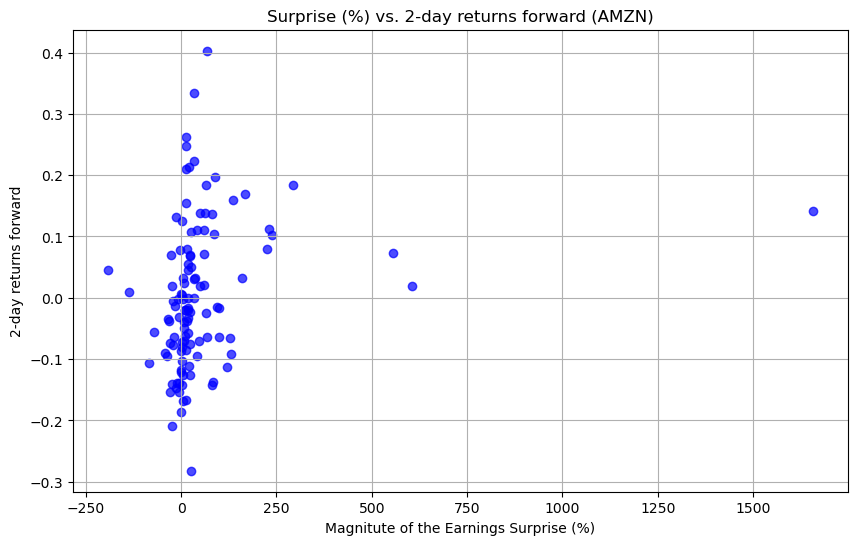

In [41]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Surprise (%)'], merged_df['2_day_pct_forward'], color='blue', alpha=0.7)

plt.title("Surprise (%) vs. 2-day returns forward (AMZN)")
plt.xlabel("Magnitute of the Earnings Surprise (%)")
plt.ylabel("2-day returns forward")
plt.grid(True)
plt.show()

In [42]:
# Calculate correlation
correlation = merged_df['Surprise (%)'].corr(merged_df['2_day_pct_forward'])
print(f"Correlation between 'Surprise (%)' and '2_day_pct_forward': {correlation:.4f}")

Correlation between 'Surprise (%)' and '2_day_pct_forward': 0.2209


#### Market reaction to earnings during bull vs. bear market

Official bear market is when price is below -20% from last ATH

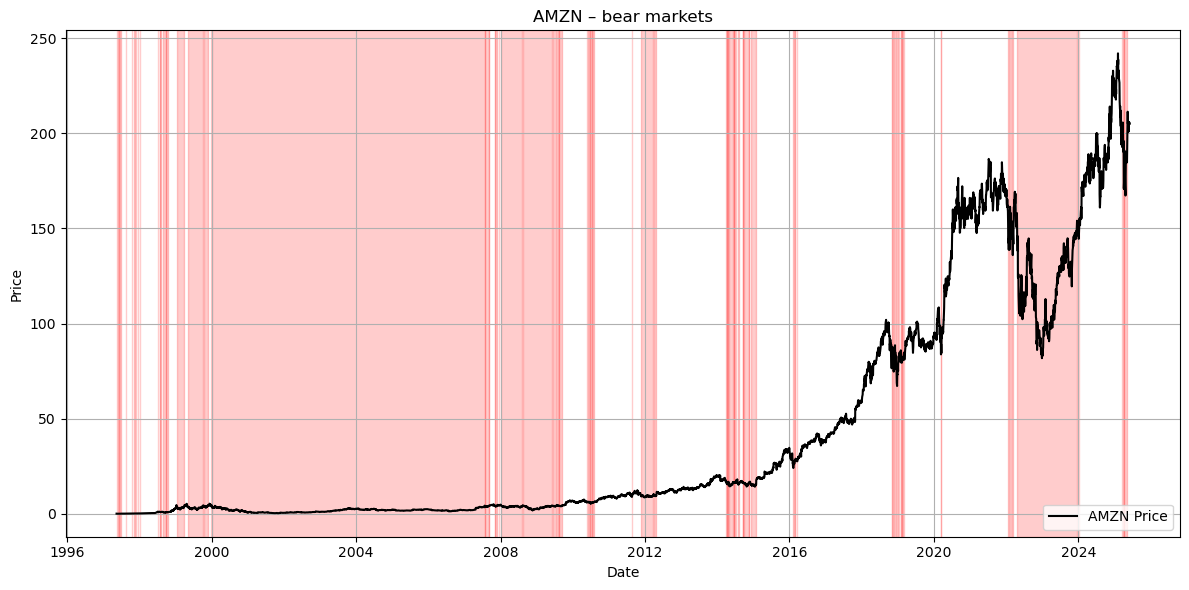

In [43]:
# Calculate peaks and drawdowns
merged_df['Peak'] = merged_df['AMZN'].cummax()
merged_df['Drawdown'] = (merged_df['AMZN'] -merged_df['Peak']) / merged_df['Peak']

# Identify drawdowns ≥20% and create sequences of bull/bear markets
mask =merged_df['Drawdown'] <= -0.20
merged_df['segment'] = (mask != mask.shift()).cumsum()

# Pull out bear market sequences (date ranges)
segments = merged_df[mask] \
    .groupby('segment') \
    .apply(lambda grp: (grp.index[0], grp.index[-1])) \
    .tolist()

# Create a list of dictionaries with bear markets
bear_periods = []
for start, end in segments:
    seg_df = merged_df.loc[start:end]
    bear_periods.append({
        'Start':        start,
        'End':          end,
        'Duration':     (end - start).days,
        'Max Drawdown': seg_df['Drawdown'].min()
    })

# Save the list to dataframe
bear_periods_df = pd.DataFrame(bear_periods)
bear_periods_df.index.name = 'Period #'

# sort by drawdown size
bear_periods_df = bear_periods_df.sort_values('Max Drawdown')
bear_periods_df = bear_periods_df.dropna(subset=['Start', 'End'])

# PLot the periods when price is below -20% from the last ATH
plt.figure(figsize=(12,6))
plt.plot(merged_df['AMZN'], label='AMZN Price', color='black')
for _, row in bear_periods_df.iterrows():
    plt.axvspan(row['Start'], row['End'], color='red', alpha=0.2)
plt.title('AMZN – bear markets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
bear_periods_df

Start        End  Duration  Max Drawdown
Period #                                              
19       2000-01-04 2007-07-24      2758     -0.944042
26       2008-08-18 2009-06-02       288     -0.671658
16       1999-05-03 1999-10-06       156     -0.593099
77       2022-04-21 2023-12-14       602     -0.561453
15       1999-01-14 1999-03-26        71     -0.515234
...             ...        ...       ...           ...
24       2007-12-17 2007-12-17         0     -0.202437
31       2010-05-20 2010-05-20         0     -0.202412
61       2018-11-05 2018-11-05         0     -0.201867
63       2018-12-07 2018-12-07         0     -0.201215
44       2014-06-17 2014-06-17         0     -0.200049

[82 rows x 4 columns]

In [45]:
# Create new feature to distinguish between bull and bear markets
merged_df['in_bear'] = False # set False as default

In [46]:
merged_df.head()

AMZN  2_day_pct_forward Symbol Company Earnings Date  \
Date                                                                   
1997-05-15  0.097917          -0.127659    NaN     NaN           NaT   
1997-05-16  0.086458          -0.054211    NaN     NaN           NaT   
1997-05-19  0.085417          -0.164639    NaN     NaN           NaT   
1997-05-20  0.081771          -0.146494    NaN     NaN           NaT   
1997-05-21  0.071354           0.051097    NaN     NaN           NaT   

           EPS Estimate Reported EPS  Surprise (%)      Peak  Drawdown  \
Date                                                                     
1997-05-15          NaN          NaN           NaN  0.097917  0.000000   
1997-05-16          NaN          NaN           NaN  0.097917 -0.117028   
1997-05-19          NaN          NaN           NaN  0.097917 -0.127659   
1997-05-20          NaN          NaN           NaN  0.097917 -0.164895   
1997-05-21          NaN          NaN           NaN  0.097917 -0.271281   

            segment  in_bear  
Date                          
1997-05-15        1    False  
1997-05-16        1    False  
1997-05-19        1    False  
1997-05-20        1    False  
1997-05-21        2    False

In [47]:
# Iterate over bear periods and update the 'in_bear' feature in merged_df
for _, row in bear_periods_df.iterrows():
    start, end = row['Start'], row['End']
    merged_df.loc[start:end, 'in_bear'] = True


In [48]:
merged_df.head()

AMZN  2_day_pct_forward Symbol Company Earnings Date  \
Date                                                                   
1997-05-15  0.097917          -0.127659    NaN     NaN           NaT   
1997-05-16  0.086458          -0.054211    NaN     NaN           NaT   
1997-05-19  0.085417          -0.164639    NaN     NaN           NaT   
1997-05-20  0.081771          -0.146494    NaN     NaN           NaT   
1997-05-21  0.071354           0.051097    NaN     NaN           NaT   

           EPS Estimate Reported EPS  Surprise (%)      Peak  Drawdown  \
Date                                                                     
1997-05-15          NaN          NaN           NaN  0.097917  0.000000   
1997-05-16          NaN          NaN           NaN  0.097917 -0.117028   
1997-05-19          NaN          NaN           NaN  0.097917 -0.127659   
1997-05-20          NaN          NaN           NaN  0.097917 -0.164895   
1997-05-21          NaN          NaN           NaN  0.097917 -0.271281   

            segment  in_bear  
Date                          
1997-05-15        1    False  
1997-05-16        1    False  
1997-05-19        1    False  
1997-05-20        1    False  
1997-05-21        2     True

In [49]:
# Filter rows with earnings events
bull_vs_bear = merged_df[merged_df['Earnings Date'].notnull()]

In [50]:
bull_vs_bear.head()

AMZN  2_day_pct_forward Symbol           Company  \
Date                                                               
1997-07-10  0.128125          -0.166665   AMZN  Amazon.com, Inc.   
1997-10-27  0.213542           0.262192   AMZN  Amazon.com, Inc.   
1998-01-22  0.256771          -0.062881   AMZN  Amazon.com, Inc.   
1998-04-27  0.344792           0.154078   AMZN  Amazon.com, Inc.   
1998-07-22  1.116667          -0.072761   AMZN  Amazon.com, Inc.   

           Earnings Date EPS Estimate Reported EPS  Surprise (%)      Peak  \
Date                                                                         
1997-07-10    1997-07-10            -            -         13.33  0.128125   
1997-10-27    1997-10-27            -            -         13.29  0.251302   
1998-01-22    1998-01-22            -            -         11.41  0.269531   
1998-04-27    1998-04-27            -            -         13.92  0.410417   
1998-07-22    1998-07-22            -            -          1.34  1.162500   

            Drawdown  segment  in_bear  
Date                                    
1997-07-10  0.000000        9    False  
1997-10-27 -0.150257       13    False  
1998-01-22 -0.047342       21    False  
1998-04-27 -0.159898       21    False  
1998-07-22 -0.039426       23    False

In [51]:
count_in  = bull_vs_bear['in_bear'].sum() # number of earning events during bear market
count_out = (~bull_vs_bear['in_bear']).sum() # number of earning events during bull market
print(f"number of earning events during bear market: {count_in}")
print(f"number of earning events during bull market: {count_out}")

number of earning events during bear market: 54
number of earning events during bull market: 58


#### Market reaction to earnings surprises during bear and bull markets 
There are 4 possible cases:
- bear market + positive earnings
- bear market + negative earnings
- bull market + positive earnings
- bull market and negative earnings

In [52]:
bull_vs_bear[(bull_vs_bear['in_bear'] == True) & (bull_vs_bear['Surprise (%)'] > 0)]['2_day_pct_forward'].median()

0.005344532948072166

In [53]:
bull_vs_bear[(bull_vs_bear['in_bear'] == False) & (bull_vs_bear['Surprise (%)'] > 0)]['2_day_pct_forward'].median()

0.0

In [54]:
bull_vs_bear[(bull_vs_bear['in_bear'] == True) & (bull_vs_bear['Surprise (%)'] < 0)]['2_day_pct_forward'].median()

-0.13898328837193008

In [55]:
bull_vs_bear[(bull_vs_bear['in_bear'] == False) & (bull_vs_bear['Surprise (%)'] < 0)]['2_day_pct_forward'].median()

-0.0348745824324415

The medians of 2-day returns following the earning events show that there is significant impact of the news when we're in bear market and earnings below expectations (-13,8%). Also when we're in bull market and earnings are below expectations (-3,5%).

#### Question 5: Brainstorm potential idea for capstone project

#### Context

Since we're approaching an inflation target of 2% (FED) and the market expects rates to be cut soon (macro-pivot), I believe commodities are very promising asset class. What is more, USA needs weak dollar to stay competitive and this also favours commodities (inversely correlated). Taking into account significant demand for energy from Data&AI sector, I would like to focus on energy commodities. Here's SP500 vs. Crude oil chart:

https://www.macrotrends.net/1453/crude-oil-vs-the-s-p-500

The idea is to outperform SP500 index by choosing only the companies from energy sector [XLE](https://www.sectorspdrs.com/mainfund/XLE). 



#### Question 6:

Apart from standard macro indicators (inflation, interest rates, consumer sentiment, etc.) and popular technical indicators (RSI, Stochastic RSI, MACD, Bollinger Bands, MAs, etc.) I would like to experiment and explore the predictive power of oil price (WTI), DXY index and [COT](https://publicreporting.cftc.gov/stories/s/r4w3-av2u) reports, which show the market sentiment among big and small players as well as hedging funds (available csv files). Also, the crude oil inventories and/or production in the USA might be a good predictor [API](https://www.eia.gov/opendata/browser/petroleum/stoc/wstk). 